# Basic Analysis

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import spacy
from wordcloud import WordCloud

nlp = spacy.load('en_core_web_sm')

In [2]:
scripts_df = pd.read_csv('Data/Raw/simpsons_script_lines.csv', dtype = 'unicode')
episods_df = pd.read_csv('Data/Raw/simpsons_characters.csv', dtype = 'unicode')
characters_df = pd.read_csv('Data/Raw/simpsons_episodes.csv', dtype = 'unicode')
locations_df = pd.read_csv('Data/Raw/simpsons_locations.csv', dtype = 'unicode')

scripts_df.head()

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,true,464,3,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,true,9,3,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,true,464,3,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,true,9,3,Lisa Simpson,Springfield Elementary School,That life is worth living.,that life is worth living,5
4,9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,true,40,3,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...,the polls will be open from now until the end ...,33


## Ten Most Active Characters

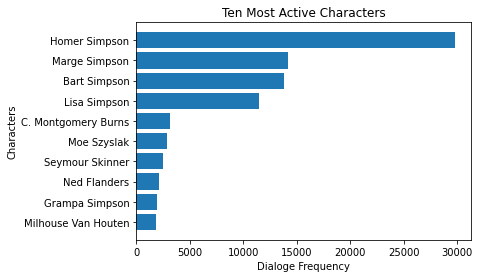

In [3]:
# Get character frequency
text_count_per_character = scripts_df['raw_character_text'].value_counts().sort_values(ascending = False)

# Draw bar plot for 10 most active characters
top = 10
plt.barh(text_count_per_character[:top].keys()[::-1], text_count_per_character[:top].values[::-1])
plt.title('Ten Most Active Characters')
plt.xlabel('Dialoge Frequency')
plt.ylabel('Characters')
plt.show()

## Next Ten Most Active Characters

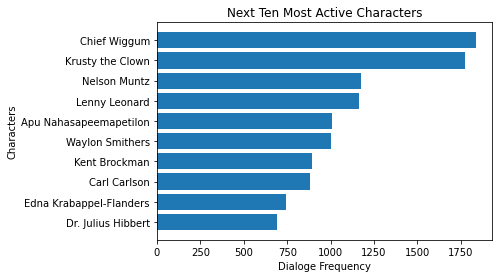

In [4]:
# Draw bar plot for 10 most active characters
top = 20
plt.barh(text_count_per_character[10:top].keys()[::-1], text_count_per_character[10:top].values[::-1])
plt.title('Next Ten Most Active Characters')
plt.xlabel('Dialoge Frequency')
plt.ylabel('Characters')
plt.show()

## Top Twenty Most Common Words

In [10]:
count_vectorizer = CountVectorizer(stop_words = 'english')
features = count_vectorizer.fit_transform(scripts_df[scripts_df['spoken_words'].isnull() == False]['spoken_words'])

# print(vectorizer.get_feature_names())

freqs = zip(count_vectorizer.get_feature_names(), features.sum(axis = 0).tolist()[0])
sorted_freqs = sorted(freqs, key = lambda x: -x[1])
print(sorted_freqs)

[('oh', 8629), ('don', 6929), ('just', 6697), ('ll', 6192), ('like', 6012), ('know', 4844), ('ve', 4689), ('hey', 4359), ('homer', 4252), ('right', 4067), ('got', 3728), ('bart', 3604), ('let', 3226), ('uh', 3075), ('good', 3057), ('yeah', 2995), ('think', 2852), ('want', 2787), ('man', 2774), ('marge', 2730), ('look', 2690), ('dad', 2646), ('gonna', 2636), ('little', 2592), ('time', 2524), ('okay', 2477), ('did', 2400), ('come', 2385), ('simpson', 2254), ('lisa', 2214), ('say', 2180), ('make', 2097), ('yes', 2029), ('really', 1956), ('love', 1843), ('going', 1830), ('way', 1784), ('boy', 1649), ('mr', 1609), ('people', 1589), ('need', 1584), ('sorry', 1564), ('day', 1548), ('tell', 1506), ('sure', 1483), ('mom', 1473), ('thing', 1471), ('new', 1435), ('didn', 1412), ('kids', 1409), ('wait', 1377), ('god', 1365), ('great', 1306), ('old', 1292), ('better', 1235), ('stop', 1212), ('life', 1201), ('sir', 1195), ('maybe', 1168), ('help', 1147), ('home', 1123), ('thank', 1122), ('big', 1095

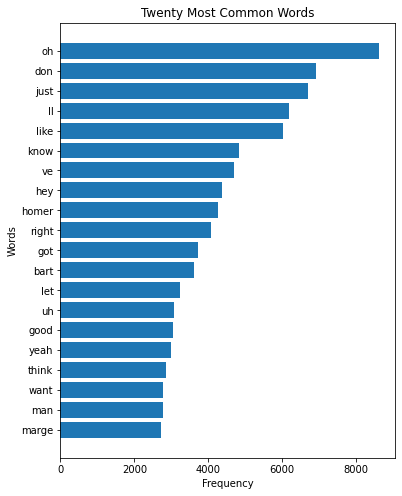

In [6]:
X, y = [], []

for freq in sorted_freqs[:20]:
    X.append(freq[0])
    y.append(freq[1])

fig = plt.figure(figsize = (6, 8))
plt.barh(X[::-1], y[::-1])
plt.title('Twenty Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

## WordClouds

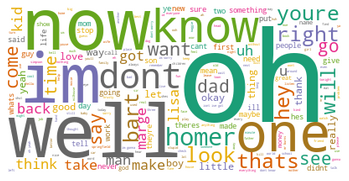

In [7]:
wc = WordCloud(
    background_color = "white",
    colormap = "Dark2",
    max_font_size = 150,
)

all_text = []
for text in scripts_df['normalized_text']:
    if str(text) != 'nan':
        all_text.append(text)

wc.generate(' '.join(all_text))

plt.imshow(wc, interpolation = 'spline36')
plt.axis("off")
plt.show()

## TF-IDF

In [16]:
tfidf_vectorizer = TfidfVectorizer(stop_words = nlp.Defaults.stop_words)
features = tfidf_vectorizer.fit_transform(scripts_df[scripts_df['spoken_words'].isnull() == False]['spoken_words'])

# print(tfidf_vectorizer.get_feature_names())

freqs = zip(count_vectorizer.get_feature_names(), features.sum(axis = 0).tolist()[0])
sorted_freqs = sorted(freqs, key = lambda x: -x[1])
print(sorted_freqs)

e:\installation root\python 3.8.7\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


[('ohmigod', 2565.160715671996), ('donates', 1830.2291105846555), ('loa', 1608.3273843589886), ('homesick', 1498.0835378317918), ('hezbollah', 1430.4467776617012), ('likin', 1426.1088092896819), ('righties', 1363.7933118244284), ('knuckle', 1353.5684959444077), ('bart', 1245.0918704744004), ('yearbooks', 1180.7621956491819), ('veejay', 1111.9481245331522), ('uhmmmm', 1056.3947078631293), ('daddilly', 1055.1229774343763), ('gotten', 1051.6731848504323), ('oklahoma', 997.4108300772776), ('gooding', 988.6597589617504), ('letters', 975.4294740642096), ('yessss', 955.508558564434), ('thinning', 930.865617204524), ('marie', 907.7980973596873), ('wanton', 871.7059313280106), ('looklooklook', 843.1174748790901), ('manana', 819.0312732105757), ('good', 812.0232102736728), ('comebacks', 800.8015964639088), ('liven', 775.3194009985772), ('listeners', 757.4606755630423), ('timin', 751.5078845788796), ('simulated', 703.1322667215825), ('goldbrick', 662.2319732269625), ('souchong', 635.3556670220107

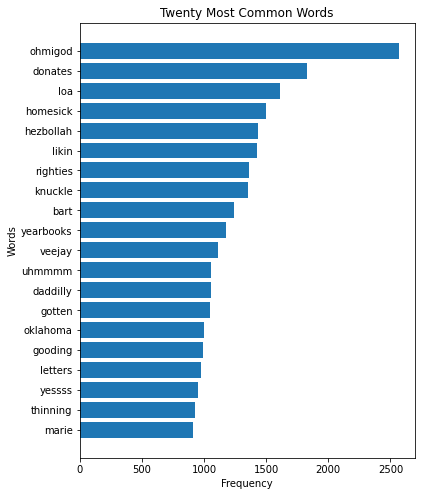

In [17]:
X, y = [], []

for freq in sorted_freqs[:20]:
    X.append(freq[0])
    y.append(freq[1])

fig = plt.figure(figsize = (6, 8))
plt.barh(X[::-1], y[::-1])
plt.title('Twenty Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()